In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#load epstein network from gexf file
G = nx.read_gexf("epstein_network.gexf")
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

Nodes: 1114
Edges: 7544


In [15]:
#states and params

NORMAL = 0
INFLUENCED = 1
OFFENDER = 2

p_normal_to_influenced = 0.5
p_influenced_to_offender = 0.3
num_steps = 50

In [16]:
#initialising model
#double check epstein is highest degree node
central_node = max(G.degree(), key=lambda x: x[1])[0]
print(f"Central node (Epstein): {central_node}")
print(f"Degree: {G.degree(central_node)}")

#distance from central (JE) to all other nodes
distances = nx.single_source_shortest_path_length(G, central_node)

#start with ALL agents as normal
state = {}
for node in G.nodes():
    state[node] = NORMAL

#just epstein as offender
state[central_node] = OFFENDER
for neighbor in G.neighbors(central_node):
    state[neighbor] = INFLUENCED

Central node (Epstein): Jeffrey Epstein
Degree: 991


In [17]:
#tracking counts
history = {
    'normal': [],
    'influenced': [],
    'offender': []
}

offender_distances = []

test that the agents are in the state they are expected to be

In [18]:
#ABM loop
np.random.seed(10)

for step in range(num_steps):
    
    #count current states
    n_normal = sum(1 for s in state.values() if s == NORMAL)
    n_influenced = sum(1 for s in state.values() if s == INFLUENCED)
    n_offender = sum(1 for s in state.values() if s == OFFENDER)
    
    history['normal'].append(n_normal)
    history['influenced'].append(n_influenced)
    history['offender'].append(n_offender)
    
    print(f"Step {step}: Normal={n_normal}, Influenced={n_influenced}, Offender={n_offender}")
    
    #storing new states to avoid simultaneous updates
    new_state = state.copy()
    
    #go thru every node
    for node in G.nodes():
        
        #RULE 1: NORMAL can become INFLUENCED
        if state[node] == NORMAL:
            for neighbor in G.neighbors(node):
                if state[neighbor] >= INFLUENCED:
                    if np.random.random() < p_normal_to_influenced:
                        new_state[node] = INFLUENCED
                        break
        
        #RULE 2: INFLUENCED can become OFFENDER
        elif state[node] == INFLUENCED:
            if np.random.random() < p_influenced_to_offender:
                new_state[node] = OFFENDER
                offender_distances.append(distances[node])
    
    #update all states & store in new_state
    state = new_state

Step 0: Normal=122, Influenced=991, Offender=1
Step 1: Normal=57, Influenced=744, Offender=313
Step 2: Normal=36, Influenced=540, Offender=538
Step 3: Normal=30, Influenced=357, Offender=727
Step 4: Normal=30, Influenced=245, Offender=839
Step 5: Normal=30, Influenced=165, Offender=919
Step 6: Normal=30, Influenced=112, Offender=972
Step 7: Normal=30, Influenced=75, Offender=1009
Step 8: Normal=30, Influenced=52, Offender=1032
Step 9: Normal=30, Influenced=41, Offender=1043
Step 10: Normal=30, Influenced=24, Offender=1060
Step 11: Normal=30, Influenced=16, Offender=1068
Step 12: Normal=30, Influenced=12, Offender=1072
Step 13: Normal=30, Influenced=9, Offender=1075
Step 14: Normal=30, Influenced=6, Offender=1078
Step 15: Normal=30, Influenced=5, Offender=1079
Step 16: Normal=30, Influenced=3, Offender=1081
Step 17: Normal=30, Influenced=3, Offender=1081
Step 18: Normal=30, Influenced=2, Offender=1082
Step 19: Normal=30, Influenced=1, Offender=1083
Step 20: Normal=30, Influenced=1, Offe

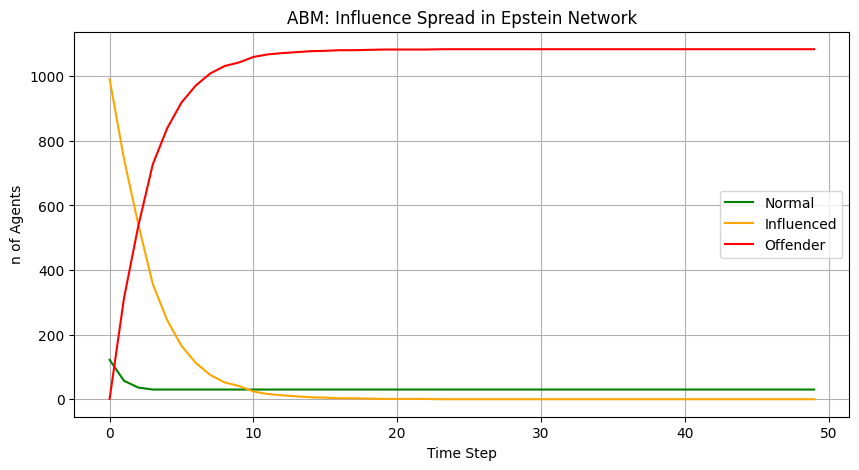

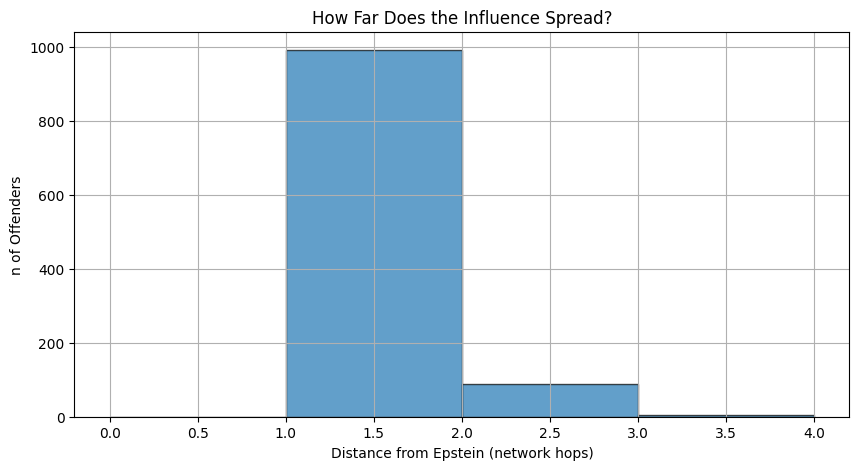

In [19]:
#plotting results
plt.figure(figsize=(10, 5))
plt.plot(history['normal'], label='Normal', color='green')
plt.plot(history['influenced'], label='Influenced', color='orange')
plt.plot(history['offender'], label='Offender', color='red')
plt.xlabel('Time Step')
plt.ylabel('n of Agents')
plt.title('ABM: Influence Spread in Epstein Network')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
if offender_distances:
    plt.hist(offender_distances, bins=range(0, max(offender_distances)+2), 
             edgecolor='black', alpha=0.7)
plt.xlabel('Distance from Epstein (network hops)')
plt.ylabel('n of Offenders')
plt.title('How Far Does the Influence Spread?')
plt.grid(True)
plt.show()

In [20]:
#summary stats
print("\n --- FINAL RESULTS --- ")
print(f"Total offenders: {sum(1 for s in state.values() if s == OFFENDER)}")
print(f"Total influenced: {sum(1 for s in state.values() if s == INFLUENCED)}")
print(f"Total normal: {sum(1 for s in state.values() if s == NORMAL)}")

if offender_distances:
    print(f"\nOffender distances from Epstein:")
    print(f"  Min: {min(offender_distances)}")
    print(f"  Max: {max(offender_distances)}")
    print(f"  Average: {np.mean(offender_distances):.2f}")


 --- FINAL RESULTS --- 
Total offenders: 1084
Total influenced: 0
Total normal: 30

Offender distances from Epstein:
  Min: 1
  Max: 3
  Average: 1.09


In [21]:
immune = [node for node, s in state.items() if s == NORMAL]
print("Immune nodes:", immune)
print("Their distances:", [distances.get(node, "unreachable") for node in immune])

Immune nodes: ['John Page', 'Kirk Blouin', 'Mr. Fried', 'Mr. Randolph', 'Ms. Van Buren', 'Ray Royce', 'Rob Walton', 'Sgt. Krauel', 'Tim Frank', 'Mr. Walton', 'Police Code Enforcement', 'Anne Boyles', 'Cheryl Kleen', 'Kathleen Ruderman', 'Grant J. Smith', 'Ken Jenne', 'Robert C. Buschel', 'Sam Fields', 'Jonathan', 'Peter Green', 'Jan Loeys', 'John Normand', 'Leo Evans', 'Matthew Lehmann', 'Nikolaos Panigirtzoglou', 'Seamus Mac Gorain', 'Paul V Morris', 'Sean T Lehane', 'jeevacation', 'live:linkspirit']
Their distances: ['unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable', 'unreachable']


In [22]:
#running with different random seeds

def run_simulation(seed, p_influence=0.3, p_offender=0.05, steps=20):
    #run one sim & return final counts
    np.random.seed(seed)
    
    #intialise states
    state = {node: NORMAL for node in G.nodes()}
    state[central_node] = OFFENDER
    
    #run sim
    for step in range(steps):
        new_state = state.copy()
        
        for node in G.nodes():
            if state[node] == NORMAL:
                for neighbor in G.neighbors(node):
                    if state[neighbor] >= INFLUENCED:
                        if np.random.random() < p_influence:
                            new_state[node] = INFLUENCED
                            break
            elif state[node] == INFLUENCED:
                if np.random.random() < p_offender:
                    new_state[node] = OFFENDER
        
        state = new_state
    
    #final states count
    n_offender = sum(1 for s in state.values() if s == OFFENDER)
    n_influenced = sum(1 for s in state.values() if s == INFLUENCED)
    n_normal = sum(1 for s in state.values() if s == NORMAL)
    
    return n_normal, n_influenced, n_offender

#run 20 sims with different seeds
results = []
for seed in range(20):
    n_normal, n_influenced, n_offender = run_simulation(seed)
    results.append({'seed': seed, 'normal': n_normal, 'influenced': n_influenced, 'offender': n_offender})
    print(f"Seed {seed}: Normal={n_normal}, Influenced={n_influenced}, Offender={n_offender}")

#summary stats across runs
offender_counts = [r['offender'] for r in results]
print(f"\n --- ACROSS 20 RUNS ---")
print(f"Offenders - Min: {min(offender_counts)}, Max: {max(offender_counts)}, Mean: {np.mean(offender_counts):.1f}")

Seed 0: Normal=30, Influenced=415, Offender=669
Seed 1: Normal=30, Influenced=420, Offender=664
Seed 2: Normal=30, Influenced=433, Offender=651
Seed 3: Normal=30, Influenced=449, Offender=635
Seed 4: Normal=30, Influenced=433, Offender=651
Seed 5: Normal=30, Influenced=460, Offender=624
Seed 6: Normal=30, Influenced=442, Offender=642
Seed 7: Normal=30, Influenced=455, Offender=629
Seed 8: Normal=30, Influenced=444, Offender=640
Seed 9: Normal=30, Influenced=432, Offender=652
Seed 10: Normal=30, Influenced=385, Offender=699
Seed 11: Normal=30, Influenced=433, Offender=651
Seed 12: Normal=31, Influenced=442, Offender=641
Seed 13: Normal=30, Influenced=411, Offender=673
Seed 14: Normal=30, Influenced=440, Offender=644
Seed 15: Normal=31, Influenced=440, Offender=643
Seed 16: Normal=30, Influenced=439, Offender=645
Seed 17: Normal=30, Influenced=456, Offender=628
Seed 18: Normal=30, Influenced=429, Offender=655
Seed 19: Normal=30, Influenced=452, Offender=632

 --- ACROSS 20 RUNS ---
Offen

In [23]:
#sensitivity analysis on p_influence
# Vary p_normal_to_influenced from 0.05 to 0.9
#keep model running while changing p_influence (aka how easily normal become influenced)
#each setting of p_influence runs 10 sims with different seeds
p_values = [0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
sensitivity_results = []

for p in p_values:
    #running 10x with different seeds
    offender_counts = []
    for seed in range(10):
        _, _, n_offender = run_simulation(seed, p_influence=p)
        offender_counts.append(n_offender)
    
    avg_offenders = np.mean(offender_counts)
    sensitivity_results.append({'p': p, 'avg_offenders': avg_offenders})
    print(f"p_influence={p}: Average offenders = {avg_offenders:.1f}")


p_influence=0.05: Average offenders = 474.7
p_influence=0.1: Average offenders = 569.8
p_influence=0.2: Average offenders = 626.5
p_influence=0.3: Average offenders = 645.7
p_influence=0.5: Average offenders = 661.1
p_influence=0.7: Average offenders = 671.1
p_influence=0.9: Average offenders = 674.6


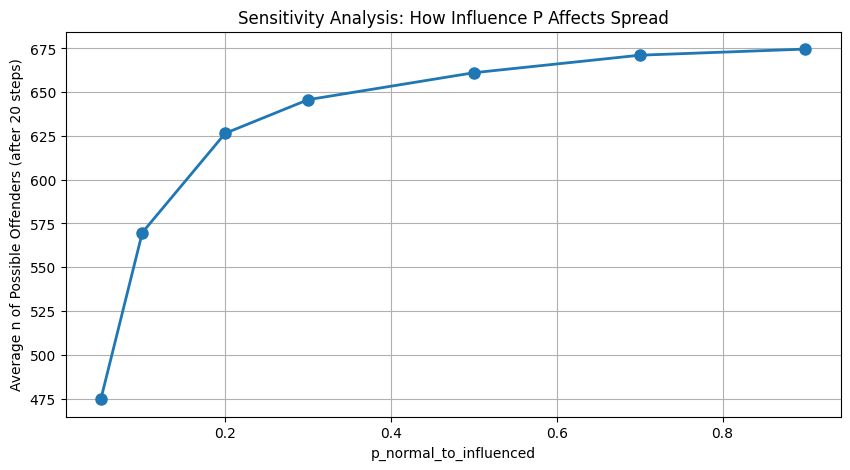

In [24]:
#plotting sensitivity analysis
plt.figure(figsize=(10, 5))
plt.plot([r['p'] for r in sensitivity_results], 
         [r['avg_offenders'] for r in sensitivity_results], 
         marker='o', linewidth=2, markersize=8)
plt.xlabel('p_normal_to_influenced')
plt.ylabel('Average n of Possible Offenders (after 20 steps)')
plt.title('Sensitivity Analysis: How Influence P Affects Spread')
plt.grid(True)
plt.show()